In [1]:
import numpy as np
from matplotlib import pyplot as plt
from naca4digit_airfoil import Naca4DigitAirfoil
import pandas as pd

In [2]:
airfoil = Naca4DigitAirfoil(c=1, M=2, P=4, T=12, a=0, offset_x=0, offset_y=0)

In [3]:
df = pd.read_csv('NACA2412.txt', delimiter=',')

In [4]:
df

,nodenumber,x,y,p,pressure-coefficient,dynamic-pressure,absolute-pressure,total-pressure,velocity-magnitude,u,v
0,1,-5.0,-5.0,1.051429,0.007629,137.812121,101326.0514,138.863549,15.000000,15.000000,0.0
1,2,-4.8,-5.0,1.052342,0.007636,137.811274,101326.0523,138.863617,14.999932,14.999932,0.0
2,3,-4.6,-5.0,1.054544,0.007652,137.808967,101326.0545,138.863511,14.999809,14.999809,0.0
3,4,-4.4,-5.0,1.058285,0.007679,137.805221,101326.0583,138.863506,14.999606,14.999606,0.0
4,5,-4.2,-5.0,1.063300,0.007716,137.800220,101326.0633,138.863519,14.999334,14.999334,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20859,20860,14.2,5.0,-0.015662,-0.000114,136.879077,101324.9843,136.863415,14.949115,14.949115,0.0
20860,20861,14.4,5.0,-0.011699,-0.000085,136.875179,101324.9883,136.863479,14.948901,14.948901,0.0
20861,20862,14.6,5.0,-0.007674,-0.000056,136.871315,101324.9923,136.863641,14.948691,14.948691,0.0
20862,20863,14.8,5.0,-0.003757,-0.000027,136.867570,101324.9962,136.863813,14.948492,14.948492,0.0


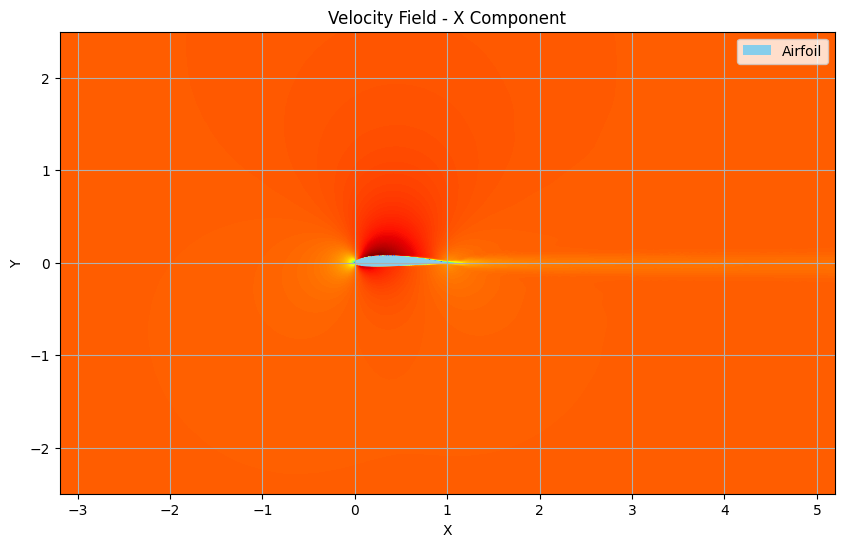

In [5]:
from scipy.interpolate import griddata
import numpy as np

X, Y = np.meshgrid(np.linspace(df['x'].min(), df['x'].max(), 1000), 
                             np.linspace(df['y'].min(), df['y'].max(), 1000))

U = griddata((df['x'], df['y']), df['u'], (X, Y), method='linear')

fig, ax = plt.subplots(figsize=(10, 6))

clev = np.arange(U.min(), U.max(), 0.01)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-2.5, 2.5)
plt.show()

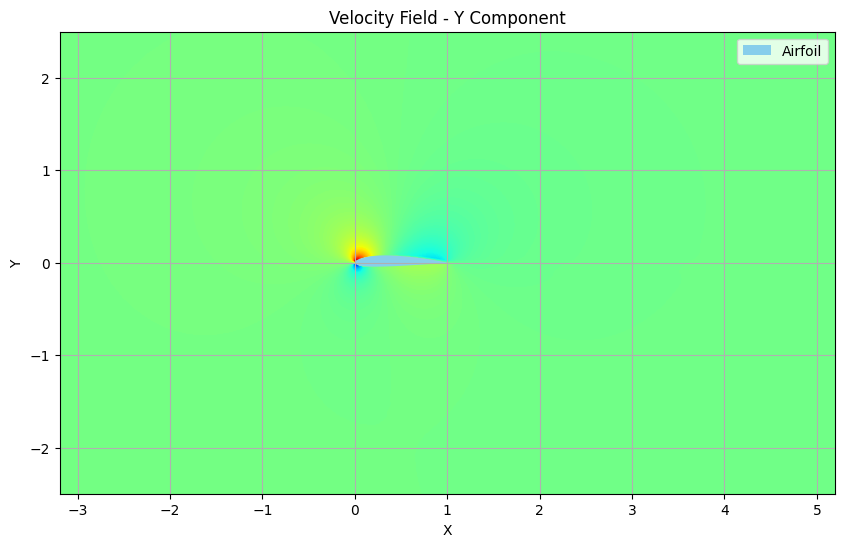

In [6]:
V = griddata((df['x'], df['y']), df['v'], (X, Y), method='linear')

fig, ax = plt.subplots(figsize=(10, 6))

clev = np.arange(V.min(), V.max(), 0.01)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-2.5, 2.5)
plt.show()

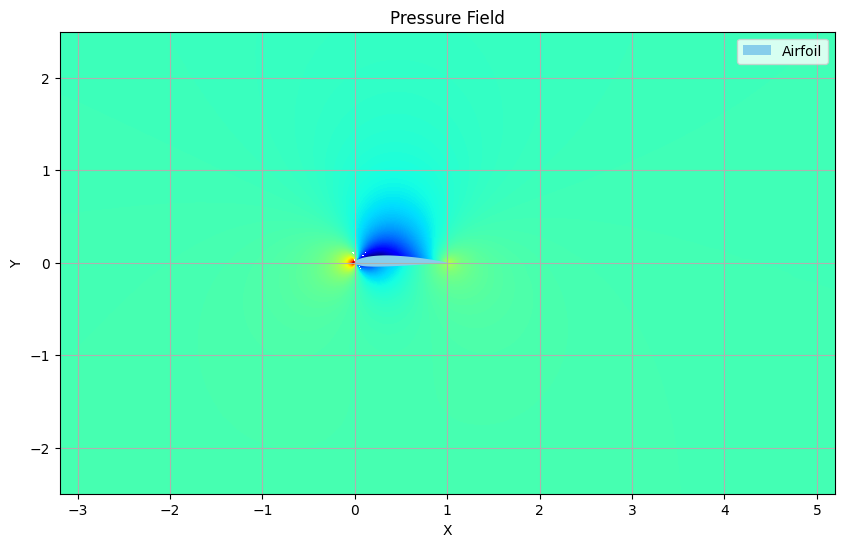

In [17]:
P = griddata((df['x'], df['y']), df['p'], (X, Y), method='linear')

fig, ax = plt.subplots(figsize=(10, 6))

clev = np.arange(P.min(), P.max(), 0.01)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Pressure Field')
airfoil.plot(ax)
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-2.5, 2.5)
plt.show()

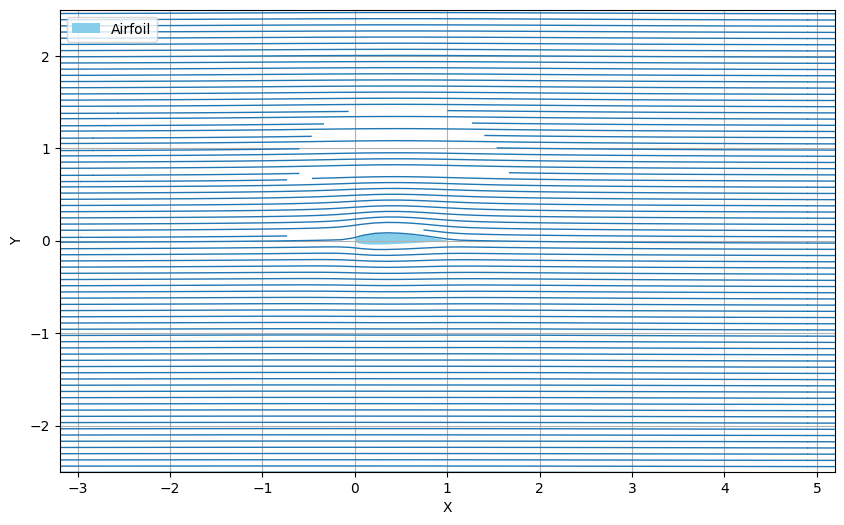

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.streamplot(X, Y, U, V, density = 5, linewidth=1, arrowsize=1, arrowstyle='-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
airfoil.plot(ax)
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-2.5, 2.5)
plt.show()